# 04.08 - Multiple Subplots

Sometimes it is helpful to compare **different views of data side by side**. To this end, Matplotlib has the concept of <code>subplots</code>: groups of smaller axes that can exist together within a single figure. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### <code>plt.axes</code>: Subplots by hand

The most basic method of creating a subplot is to use the <code>plt.axes</code> function.

By specifying a second set of axes using the coordinates <code>[left, bottom, width, height]</code> in the figure coordinate system, we can have something like this:

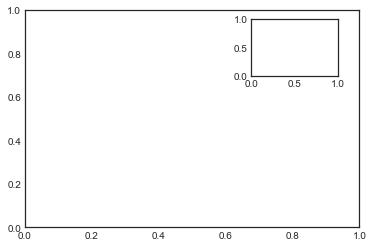

In [2]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

In the object-oriented interface, we can do somehting similar with <code>fig.add_axes()</code>:

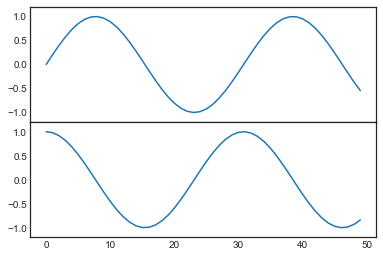

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### <code>plt.subplot</code>: Simple Grids of Subplots

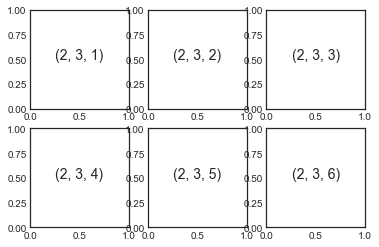

In [28]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), # rows, cols, index
             fontsize=14, ha='center')

We can adjust the spacing between these plots using <code>plt.subplots_adjust</code>:

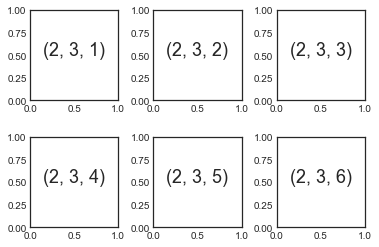

In [30]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) # h = height   w = width
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

### <code>plt.subplots</code>: The Whole Grid in One Go

The easiest tool to use is <code>plot.subplots</code> _(note the **s**)_, which creates a full grid of subplots in a single line, returning them in a NumPy array which we can then call using rows and cols:

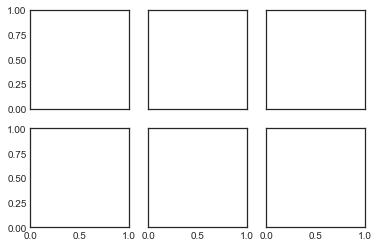

In [31]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

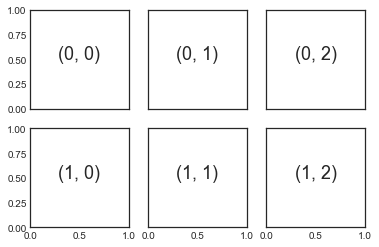

In [32]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

### <code>plt.GridSpec</code>: More Complicated Arrangements

<code>plt.GridSpec</code> allows us to have even more flexibility:

In [34]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
grid

GridSpec(2, 3)

We can now manipulate this object using the familiar Python slicing syntax:

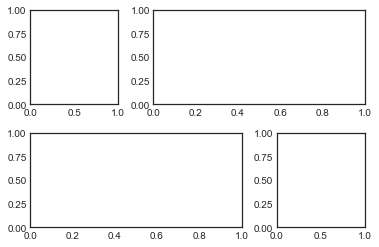

In [35]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

With this level of control, we can even several types of plots to create visualizations such as this, showing the distribution of individual variables as well as their correlation: 

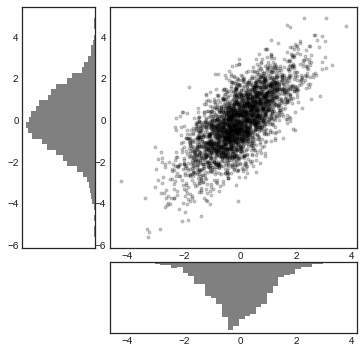

In [36]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()